In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("toy_dataset.csv", delimiter=",")

In [3]:
#Чистим датасет от пустых значений
df = df.dropna(how='any') 

In [4]:
#Проверям датасет на наличие пустых значений
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0: 
        print('detected {}row null in {}'.format(num_missing,col))
    else:
        print('column {} is okay'.format(col))

column Number is okay
column City is okay
column Gender is okay
column Age is okay
column Income is okay
column Illness is okay


Пропуски не обнаружены

In [5]:
#Первые пять строк датасета
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [6]:
#так как Number является порядковым номером строки, удалим его
df = df.drop(columns=['Number'], axis=1)

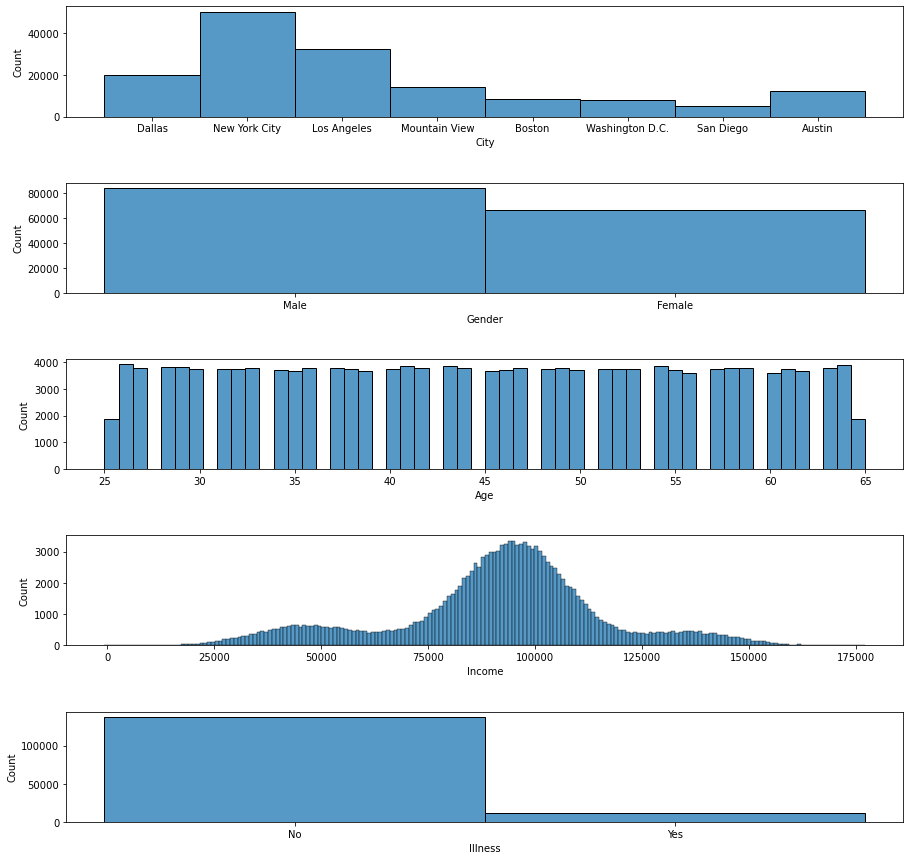

In [7]:
_, axes = plt.subplots(5, 1, figsize=(15, 15), squeeze=False)
sns.histplot(df['City'], ax=axes[0][0])
sns.histplot(df['Gender'], ax=axes[1][0])
sns.histplot(df['Age'], ax=axes[2][0])
sns.histplot(df['Income'], ax=axes[3][0])
sns.histplot(df['Illness'], ax=axes[4][0])
plt.subplots_adjust(hspace=0.6)
plt.show()

In [8]:
df.dtypes

City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [9]:
#Преобразуем столбы с категиориальными признаками: "City", "Gender", "Illness"
letypecity = LabelEncoder()
learrcity = letypecity.fit_transform(df["City"])
df["City"] = learrcity

In [10]:
letypegender = LabelEncoder()
learrgender = letypegender.fit_transform(df["Gender"])
df["Gender"] = learrgender

In [11]:
letypeilness = LabelEncoder()
learrillness = letypeilness.fit_transform(df["Illness"])
df["Illness"] = learrillness

In [12]:
#Проверим преобразования
print(np.unique(df["City"]), '--City--')
print(np.unique(df["Gender"]), '--Gender--')
print(np.unique(df["Illness"]), '--Illness--')
df.dtypes

[0 1 2 3 4 5 6 7] --City--
[0 1] --Gender--
[0 1] --Illness--


City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

In [13]:
#Корреляционный анализ
#В качестве целевого признака выберем столбец "Gender" (0 - мужчины, 1 - женщины).
df.corr()

,City,Gender,Age,Income,Illness
City,1.000000,0.002188,-0.000636,0.234541,-0.001712
Gender,0.002188,1.000000,-0.003653,0.198888,0.001297
Age,-0.000636,-0.003653,1.000000,-0.001318,0.001811
Income,0.234541,0.198888,-0.001318,1.000000,0.000298
Illness,-0.001712,0.001297,0.001811,0.000298,1.000000


<AxesSubplot:>

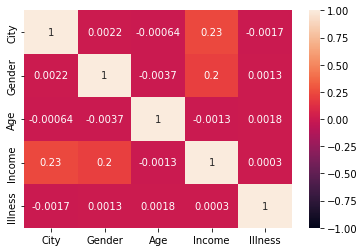

In [14]:
#Графики корреляции
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

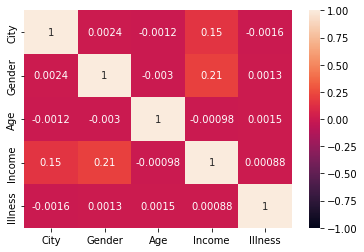

In [17]:
sns.heatmap(df.corr(method="kendall"), vmax=1, vmin=-1, annot=True)

<AxesSubplot:>

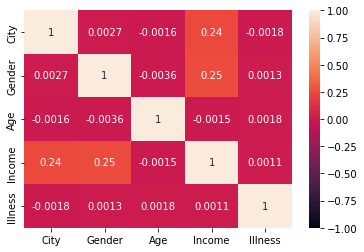

In [16]:
sns.heatmap(df.corr(method="spearman"), vmax=1, vmin=-1,annot=True )

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак наиболее сильно коррелирует с доходом ("Income", 0.20)
Целевой признак слабо коррелирует c городом ("City", 0.0022), возрастом ("Age", -0.0037) и болезнью ("Illness", 0.0013)
Наблюдается корреляция города ("City") с доходом ("Income") - 0.23
Сильно корреляции (>0.5) не наблюдается, значит все признаки можно оставить в модели.